In [1]:
import pandas as pd
import statistics as st
import math
URL='http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv' 
data=pd.read_csv(URL)
print(data)     # выводим на экран таблицу
A = data["poverty"] # массив уровня бедности
B = data["hs_grad"] # массив уровня образования
#print(A)
#print(B)

from matplotlib import pyplot



#pyplot.scatter(B, A) # график зависимости (skatter-plot) бедности от уровня образования
#pyplot.show()

sdA=st.stdev(A) # вычисляем среднеквадратичное отклонение для уровня бедности
#print(sdA)
sdB=st.stdev(B) # вычисляем среднеквадратичное отклонение для уровня образования
r=st.correlation(A,B)
b1=(sdA/sdB)*r
b0=st.mean(A)-b1*st.mean(B)


def plot_regression_line(B, A,b):
    # plotting the actual points as scatter plot
    pyplot.scatter(B, A, color = "m")
             
  
    # predicted response vector - задаем уравнение прямой линии регрессии
    y_pred = b0 + b1*B
  
    # plotting the regression line - выводим линию регрессии 
    pyplot.plot(B, y_pred, color = "g")
  
    # putting labels - обзываем наши оси 
    pyplot.xlabel('B')
    pyplot.ylabel('A')
    
  
    # function to show plot
    pyplot.show()

  
def main():
    # observations / data
    
    # estimating coefficients
    b = estimate_coef(B, A)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b0, b1))
  
    # plotting regression line
    plot_regression_line(B, A, b)
  
if __name__ == "__main__":
    main()

print('корреляция равна= ', r)

dataRES=[] # массив для квадратов остатков
dataRESID=[] # массив для остатков
dataTOT=[] 
dataYpred=[]
dataR=[]

for i in range(0,len(B)): # считаем все значения y(с шапкой) для регрессионной прямой
    y_pred_i=b0+b1*B[i]
    dataYpred.append(y_pred_i)
    
for i in range(0,len(A)):
    
    SS1=(A[i]-dataYpred[i])**2 # считаем все значения квадратов остатков residuals
    dataRES.append(SS1)
    SSresid=(A[i]-dataYpred[i])
    dataRESID.append(SSresid)
    
    SS2=(A[i]-st.mean(A))**2 # считаем все значения общей суммы квадратов TOTAL 
    dataTOT.append(SS2)
    
    SSR=(st.mean(A)-dataYpred[i])**2 # считаем все значения разницы квадратов для детерминанта (для объяснения отклонений)
    dataR.append(SSR) 
    
R2=1-sum(dataRES)/sum(dataTOT) # вычисляем детерминант

dataE=[]
for i in range(0,len(B)): # считаем стандартное отклонение для значений уровня образования
    E=(B[i]-st.mean(B))**2
    dataE.append(E)


SE_b1=math.sqrt(sum(dataRES)/sum(dataE)/49) # вычисляем ошебку среднего для показателя b1

pyplot.scatter(B, dataRESID) # график распределения (skatter-plot) остатков по образованию
pyplot.xlabel('hs_grad')
pyplot.ylabel('Residuals')
pyplot.show()

print('коэфф детерминации равен = ' , R2)
print('ошибка среднего SE для бедности = ', sdA/math.sqrt(51))
print('ошибка среднего SE для образования = ', sdB/math.sqrt(51))
print(' ошибка среднего для b1 = ', SE_b1)
    
#print(b1, b0)

#print(sdA2)  


# вычисляем показатель фишера для оценки значимости уравнения в целом
F=sum(dataR)/(sum(dataRES)/(len(A)-2))
print(' показатель Фишера для оценки значимости уравнения регрессии равен ' , F)




# УКРАДЕНО ИЗ ПРИМЕРА НИЖЕ - ПОСТРОЕНИЕ ГРАФИКОВ!!!!

# создаем графики
fig, (ax1,ax2) = pyplot.subplots(nrows=2, ncols=1, figsize=(6, 9))
# scatter plot
ax1.scatter(B,dataRESID) # здесь создаем распределение остатков относительно уровня образования
ax1.plot(B,[0]*len(B),'--r') #здесь задаем нулевую линию остатков и обозначаем ее стиль и цвет
# Q-Q plot
sma.qqplot(residuals, line='s', ax = ax2)    # здесь строим график квантиль-квантиль для остатков
                                            # оператор qqplot уже знает что такое residuals

ax1.set_title('Анализ остатков')
ax1.set_xlabel('Среднее образование (%)')
ax1.set_ylabel('Остатки')

ax2.set_title('QQ-Plot')




                    state  metro_res  white  hs_grad  poverty  female_house
0                 Alabama       55.4   71.3     79.9     14.6          14.2
1                  Alaska       65.6   70.8     90.6      8.3          10.8
2                 Arizona       88.2   87.7     83.8     13.3          11.1
3                Arkansas       52.5   81.0     80.9     18.0          12.1
4              California       94.4   77.5     81.1     12.8          12.6
5                Colorado       84.5   90.2     88.7      9.4           9.6
6             Connecticut       87.7   85.4     87.5      7.8          12.1
7                Delaware       80.1   76.3     88.7      8.1          13.1
8   District  of Columbia      100.0   36.2     86.0     16.8          18.9
9                 Florida       89.3   80.6     84.7     12.1          12.0
10                Georgia       71.6   67.5     85.1     12.1          14.5
11                 Hawaii       91.5   25.9     88.5     10.6          12.4
12          

NameError: name 'estimate_coef' is not defined

In [22]:
import pandas as pd н

import scipy.stats as stats

URL = 'http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv' # как открыть таблицу тупо из ссылки, не скачивая ее
data = pd.read_csv(URL)

A = data["poverty"] # массив уровня бедности
B = data["hs_grad"] # массив уровня образования

stats.f_oneway(B,A) # однофакторный дисперсионный анализ


F_onewayResult(statistic=12104.083185045043, pvalue=3.7787472440651314e-106)

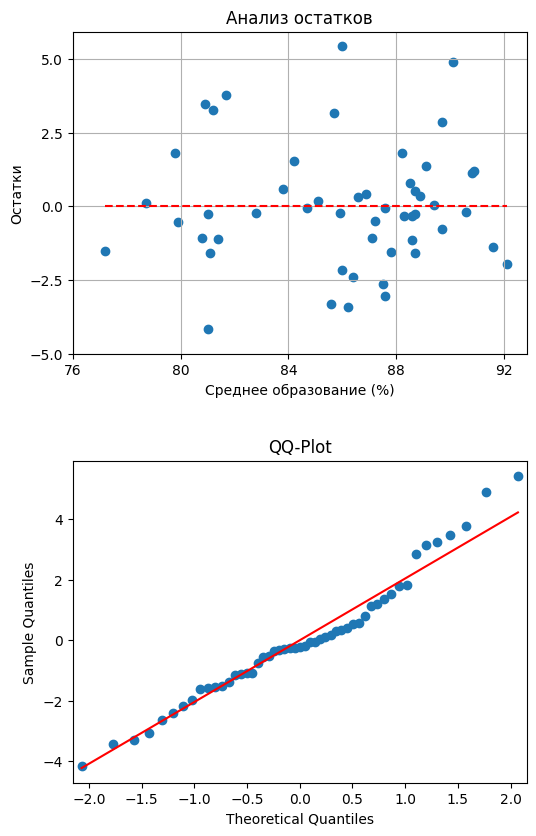

In [9]:
# альтернативное построение графиков
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import statsmodels.api as sma

# получаем данные и вычисляем коэффициэнты регрессионной модели
URL='http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv' 
data=pd.read_csv(URL, sep=',')

intercept, slope = sm.ols(formula="poverty ~ hs_grad", data=data).fit().params
X = data['hs_grad']
Y = data['poverty']


# вычисляем остатки - на сколько Y далека от теоретической модели
residuals = Y - intercept - slope*X
x1=np.linspace(min(X),max(X),len(X))

# создаем графики
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 9))
# scatter plot
ax1.scatter(X,residuals)
ax1.plot(x1,[0]*len(x1),'--r')
# Q-Q plot
sma.qqplot(residuals, line='s', ax = ax2)

ax1.grid()
ax1.set_title('Анализ остатков')
ax1.set_xlabel('Среднее образование (%)')
ax1.set_ylabel('Остатки')
ax1.set_xticks(np.arange(76,93, step=4))
ax1.set_yticks(np.arange(-5,6, step=2.5))

ax2.set_title('QQ-Plot')

fig.tight_layout(pad=3.0)
plt.show()

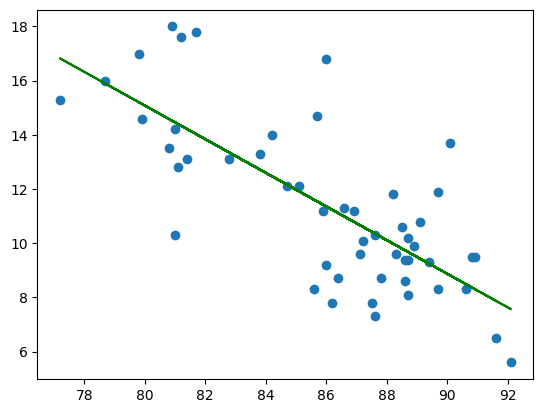

In [20]:
# ТОЛЬКО ДЛЯ НАНЕСЕНИЯ ЛИНИИ УПРОЩЕННО!

import pandas as pd
import statistics as st
import math
URL='http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv' 
data=pd.read_csv(URL)
#print(data)     # выводим на экран таблицу
A = data["poverty"] # массив уровня бедности
B = data["hs_grad"] # массив уровня образования
#print(A)
#print(B)

from matplotlib import pyplot

sdA=st.stdev(A) # вычисляем среднеквадратичное отклонение для уровня бедности
#print(sdA)
sdB=st.stdev(B) # вычисляем среднеквадратичное отклонение для уровня образования
r=st.correlation(A,B)
b1=(sdA/sdB)*r
b0=st.mean(A)-b1*st.mean(B)
y_pred = b0 + b1*B

pyplot.scatter(B, A) # график зависимости (skatter-plot) бедности от уровня образования
pyplot.plot(B,y_pred,'-g') #Рисуем линию конкретного цвета g=green
pyplot.show()

In [22]:
import pandas as pd
df = pd.read_csv('http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv')
import statsmodels.formula.api as smf
m1 = smf.ols('poverty ~ hs_grad', 
             data=df)
fitted = m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                poverty   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     61.81
Date:                Sat, 29 Oct 2022   Prob (F-statistic):           3.11e-10
Time:                        11:44:55   Log-Likelihood:                -108.74
No. Observations:                  51   AIC:                             221.5
Df Residuals:                      49   BIC:                             225.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.7810      6.803      9.523      0.0